<a href="https://colab.research.google.com/github/HasKhan89/PYnotebooks/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression: A Core Task in Predictive Analytics

Regression is a fundamental task in supervised learning, where the goal is to predict a continuous output variable (target) based on one or more input variables (features). Unlike classification tasks that deal with discrete labels, regression focuses on estimating numerical values.

<br>

  <div style="text-align: center;">
    <img src="attachment:b8ab5fa2-4f5b-4225-9c89-fbe9191a2fe8.png" alt="image" style="width:50%;"/>
  </div>

<br>

---

## **Key Objectives of Regression**
- **Prediction:** Forecasting continuous values, such as house prices, stock market trends, or temperature changes.
- **Relationship Analysis:** Understanding and quantifying the relationship between dependent (target) and independent (input) variables.
- **Optimization:** Using regression models in optimization scenarios, such as reducing costs or maximizing efficiency.

---

## **Common Types of Regression**
### 1. **Linear Regression**
- Assumes a linear relationship between input features and the target variable.
- The model's equation:
$$
  y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n + \epsilon
$$
- Example Task: Predicting house prices based on size, number of rooms, and location.

<br>

  <div style="text-align: center;">
    <img src="attachment:de4be244-bb23-4303-9b22-9635222b5dc0.png" alt="image" style="width:30%;"/>
  </div>

<br>


### 2. **Polynomial Regression**
- Extends linear regression by introducing polynomial terms to capture non-linear relationships.
- Example Task: Modeling the growth of a business over time with diminishing returns.


### 3. **Ridge, Lasso, and ElasticNet Regression**
- Regularized regression techniques that prevent overfitting by penalizing large coefficients:
  - **Ridge Regression:** \( L2 \) regularization.
  - **Lasso Regression:** \( L1 \) regularization.
  - **ElasticNet:** Combines \( L1 \) and \( L2 \).

<br>

  <div style="text-align: center;">
    <img src="attachment:65b9900d-dd6f-4b58-8842-9249a86f9f38.png" alt="image" style="width:30%;"/>
  </div>

<br>

### 4. **Support Vector Regression (SVR)**
- Applies the principles of Support Vector Machines (SVM) for regression tasks.
- Example Task: Predicting the demand for a product under varying market conditions.

<br>

  <div style="text-align: center;">
    <img src="attachment:d2013e6e-52cc-4f9a-93eb-09cf132a3938.png" alt="image" style="width:30%;"/>
  </div>

<br>

### 5. **Decision Tree and Random Forest Regression**
- Tree-based methods partition data into smaller subsets and fit simple models to each partition.
- Example Task: Predicting energy consumption based on weather patterns.

<br>

  <div style="text-align: center;">
    <img src="attachment:bda63229-f94e-4881-8719-cfb93a24e4c8.png" alt="image" style="width:30%;"/>
  </div>

<br>

---

## **Workflow for Regression Tasks**
### 1. **Problem Definition**
- Clearly define the target variable and the features.
- Example: Predicting monthly sales revenue based on advertising spend and market conditions.

### 2. **Data Preprocessing**
- **Handling Missing Values:** Fill or drop missing data points.
- **Feature Scaling:** Normalize features to improve model convergence.
- **Encoding Categorical Variables:** Convert categorical data into numerical form.

### 3. **Model Training**
- Split data into training and testing sets.
- Fit a regression model to the training data.

### 4. **Evaluation**
- Use metrics to assess the model's performance:
  - **Mean Absolute Error (MAE):** Average of absolute differences between actual and predicted values.
  - **Mean Squared Error (MSE):** Average of squared differences.
  - **R-squared (\(R^2\)):** Proportion of variance explained by the model.

### 5. **Optimization**
- Fine-tune the model by adjusting hyperparameters or using feature selection techniques.

---

## **Advantages and Challenges**

### Advantages:
- Simple models like linear regression are easy to interpret.
- Useful for tasks requiring numeric predictions.

### Challenges:
- May struggle with non-linear relationships (solvable with polynomial regression or advanced models).
- Sensitive to outliers and multicollinearity among features.

---



In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline


In [ ]:
#imports from sklearn library
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
bos = pd.read_csv("boston.csv")

:Attribute Information (in order):
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's


In [ ]:
bos

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
#Check the shape of dataframe
bos.shape


(506, 14)

In [ ]:
bos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
bos.nunique()


crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

In [ ]:
bos.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Finding out the correlation between the features
corr = bos.corr()
corr.shape


(14, 14)

<Axes: >

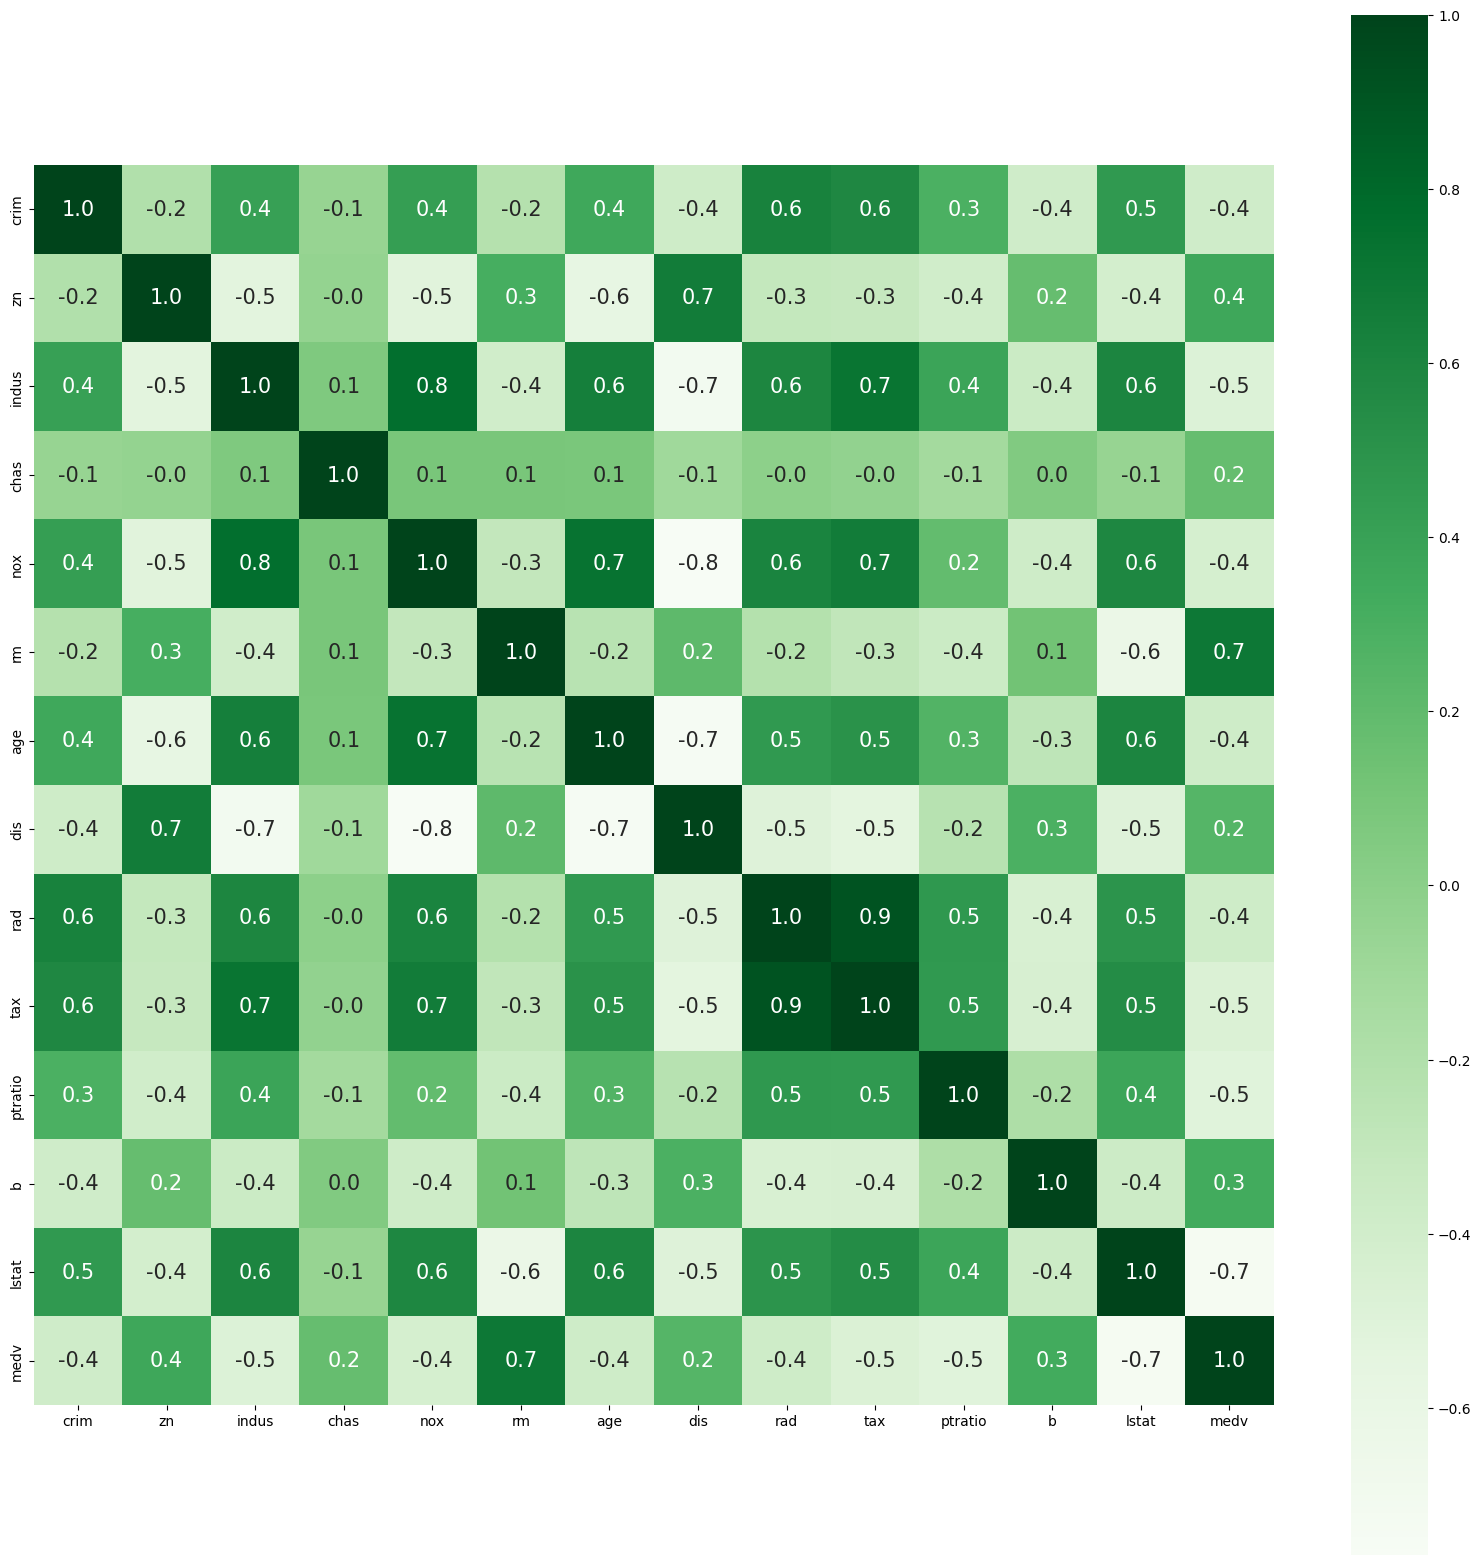

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')


In [ ]:
# Spliting target variable and independent variables
X = bos.drop(['medv'], axis = 1)
y = bos['medv']


In [ ]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)


### 1. **Linear Regression**


In [ ]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Value of y intercept
lm.intercept_


36.357041376595795

### **Practical Meaning**

- It is the starting point of the regression line on the \( y \)-axis.
- In some contexts, it represents the baseline or default prediction when no independent variable has any influence (all inputs are zero).

---

### **Interpretation in Context**

#### **When it is meaningful:**
- If having all independent variables set to zero is a realistic scenario, the y-intercept provides useful baseline information.
  - **Example**: Predicting house prices:
    - **Intercept = $50,000**: A property with zero size, no bedrooms, and no bathrooms (hypothetically) would have a baseline price of $50,000.

#### **When it is not meaningful:**
- If setting all variables to zero is unrealistic or nonsensical, the y-intercept has little interpretive value.
  - **Example**: Predicting weight based on height:
    - **Intercept = −50 kg**: This does not make sense because a height of zero is not physically meaningful.


In [ ]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients


,Attribute,Coefficients
0,crim,-0.12257
1,zn,0.055678
2,indus,-0.008834
3,chas,4.693448
4,nox,-14.435783
5,rm,3.28008
6,age,-0.003448
7,dis,-1.552144
8,rad,0.32625
9,tax,-0.014067


In [ ]:
# Model prediction on train data
y_train_pred = lm.predict(X_train)

# Model prediction on train data
y_test_pred = lm.predict(X_test)



In [ ]:
# Metrics for train data
lr_train_r2 = r2_score(y_train, y_train_pred)
lr_train_adjusted_r2 = 1 - (1 - lr_train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
lr_train_mae = mean_absolute_error(y_train, y_train_pred)
lr_train_mse = mean_squared_error(y_train, y_train_pred)
lr_train_rmse = np.sqrt(lr_train_mse)

# Metrics for test data
lr_test_r2 = r2_score(y_test, y_test_pred)
lr_test_adjusted_r2 = 1 - (1 - lr_test_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
lr_test_mae = mean_absolute_error(y_test, y_test_pred)
lr_test_mse = mean_squared_error(y_test, y_test_pred)
lr_test_rmse = np.sqrt(lr_test_mse)

# Print Results
print("Train Data Metrics:")
print(f"R2: {lr_train_r2:.4f}")
print(f"Adjusted R2: {lr_train_adjusted_r2:.4f}")
print(f"MAE: {lr_train_mae:.4f}")
print(f"MSE: {lr_train_mse:.4f}")
print(f"RMSE: {lr_train_rmse:.4f}")

print("\nTest Data Metrics:")
print(f"R2: {lr_test_r2:.4f}")
print(f"Adjusted R2: {lr_test_adjusted_r2:.4f}")
print(f"MAE: {lr_test_mae:.4f}")
print(f"MSE: {lr_test_mse:.4f}")
print(f"RMSE: {lr_test_rmse:.4f}")


Train Data Metrics:
R2: 0.7466
Adjusted R2: 0.7369
MAE: 3.0899
MSE: 19.0737
RMSE: 4.3673

Test Data Metrics:
R2: 0.7122
Adjusted R2: 0.6851
MAE: 3.8590
MSE: 30.0540
RMSE: 5.4822


# Regression Metrics and Their Applications

<br>

  <div style="text-align: center;">
    <img src="attachment:336a3bd0-b002-4d76-9a8f-fbfa2e965000.png" alt="image" style="width:40%;"/>
  </div>

<br>

In regression analysis, several key metrics are used to evaluate model performance:

---

## **1. R² (Coefficient of Determination)**
- **Definition**: R² represents the proportion of the dependent variable's total variance explained by the independent variables.
- **Range**: Between 0 and 1 (0: No explanation, 1: Fully explained).
- **Advantages**: Useful for quickly understanding the overall performance of the model.
- **Disadvantages**: Increases with the addition of more variables, even if they are not meaningful, potentially leading to overfitting.
- **Applications**:
  - Assessing the overall explanatory power of the model.
  - Comparing R² values across models (when the number of variables is the same).

<br>

  <div style="text-align: center;">
    <img src="attachment:1c0d90d9-8bbc-4fc0-a7ee-a3510218497c.png" alt="image" style="width:20%;"/>
  </div>

<br>

---

## **2. Adjusted R²**
- **Definition**: Adjusted R² is a modified version of R² that accounts for the number of independent variables in the model.
- **Range**: Generally within the same range as R² but can be lower.
- **Advantages**: Prevents overfitting by increasing only when new variables improve the model meaningfully.
- **Disadvantages**: Slightly more complex to interpret than R².
- **Applications**:
  - Reliable measure of explanatory power in multiple regression models.
  - Identifying and controlling model complexity by spotting unnecessary variables.

---

## **3. MAE (Mean Absolute Error)**
- **Definition**: The average of the absolute differences between actual and predicted values.
- **Formula**:
$$
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
- **Advantages**: Directly conveys the magnitude of prediction errors.
- **Disadvantages**: Treats all errors equally, regardless of their size.
- **Applications**:
  - Measuring prediction accuracy.
  - When a simple and interpretable error metric is needed.


<br>

  <div style="text-align: center;">
    <img src="attachment:226ed9fd-f43a-4197-9cb8-87f5679a5f8a.png" alt="image" style="width:20%;"/>
  </div>

<br>

---

## **4. MSE (Mean Squared Error)**
- **Definition**: The mean of the squared differences between actual and predicted values.
- **Formula**:
$$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
- **Advantages**: Penalizes larger errors more heavily, making it sensitive to significant deviations.
- **Disadvantages**: Not scale-invariant, and its unit differs from the dependent variable.
- **Applications**:
  - Situations where large errors need to be minimized.
  - Optimizing statistical models mathematically.

<br>

  <div style="text-align: center;">
    <img src="attachment:8dd3fef7-e71c-49e7-bf96-fb8156f464fb.png" alt="image" style="width:30%;"/>
  </div>

<br>

---

## **5. RMSE (Root Mean Squared Error)**
- **Definition**: The square root of MSE, restoring errors to their original units.
- **Formula**:
$$
  \text{RMSE} = \sqrt{\text{MSE}}
$$
- **Advantages**: Retains the same unit as the dependent variable, making interpretation straightforward.
- **Disadvantages**: Like MSE, sensitive to large errors.
- **Applications**:
  - Evaluating the magnitude of errors.
  - Comparing performance across models on the same scale.

---

## When to Use Which Metric?

1. **Overall Explanatory Power**:
   - **R² and Adjusted R²**: Understanding how much variance in the dependent variable is explained by the model.

2. **Evaluating Errors**:
   - **MAE**: Simpler metric for understanding the size of errors.
   - **MSE and RMSE**: Useful when large errors are critical, especially for outlier-sensitive contexts.

3. **Model Comparison**:
   - Adjusted R²: Provides a fair comparison across models with differing numbers of variables.
   - RMSE: Enables direct comparison of errors on the same unit scale.

---

These metrics should be considered together, depending on the purpose and nature of the problem. Each provides different insights into model performance, and combining multiple metrics often leads to more robust evaluations.


In [ ]:
# Print Results
print("Train Data Metrics:")
print(f"R2: {lr_train_r2:.4f}")
print(f"Adjusted R2: {lr_train_adjusted_r2:.4f}")
print(f"MAE: {lr_train_mae:.4f}")
print(f"MSE: {lr_train_mse:.4f}")
print(f"RMSE: {lr_train_rmse:.4f}")

print("\nTest Data Metrics:")
print(f"R2: {lr_test_r2:.4f}")
print(f"Adjusted R2: {lr_test_adjusted_r2:.4f}")
print(f"MAE: {lr_test_mae:.4f}")
print(f"MSE: {lr_test_mse:.4f}")
print(f"RMSE: {lr_test_rmse:.4f}")


Train Data Metrics:
R2: 0.7466
Adjusted R2: 0.7369
MAE: 3.0899
MSE: 19.0737
RMSE: 4.3673

Test Data Metrics:
R2: 0.7122
Adjusted R2: 0.6851
MAE: 3.8590
MSE: 30.0540
RMSE: 5.4822


## 1.a Ridge and Lasso

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
ridge = Ridge(alpha=1.0, random_state=42)  # Adjust alpha as necessary
ridge.fit(X_train, y_train)


# Predictions
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)

# Train Metrics
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_train_adjusted_r2 = 1 - (1 - ridge_train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
ridge_train_mae = mean_absolute_error(y_train, ridge_train_pred)
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_train_rmse = np.sqrt(ridge_train_mse)

# Test Metrics
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
ridge_test_adjusted_r2 = 1 - (1 - ridge_test_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
ridge_test_mae = mean_absolute_error(y_test, ridge_test_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(ridge_test_mse)

print("\nRidge Regression - Test Metrics:")
print(f"R2: {ridge_test_r2:.4f}")
print(f"Adjusted R2: {ridge_test_adjusted_r2:.4f}")
print(f"MAE: {ridge_test_mae:.4f}")
print(f"MSE: {ridge_test_mse:.4f}")
print(f"RMSE: {ridge_test_rmse:.4f}")

# Lasso Regression
lasso = Lasso(alpha=0.1, random_state=42)  # alpha: ceza terimi
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)


# Predictions
lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)

# Train Metrics
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_train_adjusted_r2 = 1 - (1 - lasso_train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
lasso_train_mae = mean_absolute_error(y_train, lasso_train_pred)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_train_rmse = np.sqrt(lasso_train_mse)

# Test Metrics
lasso_test_r2 = r2_score(y_test, lasso_test_pred)
lasso_test_adjusted_r2 = 1 - (1 - lasso_test_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
lasso_test_mae = mean_absolute_error(y_test, lasso_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)
lasso_test_rmse = np.sqrt(lasso_test_mse)

print("\nLasso Regression - Test Metrics:")
print(f"R2: {lasso_test_r2:.4f}")
print(f"Adjusted R2: {lasso_test_adjusted_r2:.4f}")
print(f"MAE: {lasso_test_mae:.4f}")
print(f"MSE: {lasso_test_mse:.4f}")
print(f"RMSE: {lasso_test_rmse:.4f}")



Ridge Regression - Test Metrics:
R2: 0.7086
Adjusted R2: 0.6811
MAE: 3.8624
MSE: 30.4283
RMSE: 5.5162

Lasso Regression - Test Metrics:
R2: 0.7068
Adjusted R2: 0.6792
MAE: 3.8536
MSE: 30.6143
RMSE: 5.5330


## Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

# Predictions
y_train_pred_svr = svr.predict(X_train)
y_test_pred_svr = svr.predict(X_test)

# Train Metrics
r2_train_svr = r2_score(y_train, y_train_pred_svr)
adjusted_r2_train_svr = 1 - (1 - r2_train_svr) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
mae_train_svr = mean_absolute_error(y_train, y_train_pred_svr)
mse_train_svr = mean_squared_error(y_train, y_train_pred_svr)
rmse_train_svr = np.sqrt(mse_train_svr)

# Test Metrics
r2_test_svr = r2_score(y_test, y_test_pred_svr)
adjusted_r2_test_svr = 1 - (1 - r2_test_svr) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae_test_svr = mean_absolute_error(y_test, y_test_pred_svr)
mse_test_svr = mean_squared_error(y_test, y_test_pred_svr)
rmse_test_svr = np.sqrt(mse_test_svr)



In [ ]:
print("\nSVR Model - Test Metrics:")
print(f"R2: {r2_test_svr:.4f}")
print(f"Adjusted R2: {adjusted_r2_test_svr:.4f}")
print(f"MAE: {mae_test_svr:.4f}")
print(f"MSE: {mse_test_svr:.4f}")
print(f"RMSE: {rmse_test_svr:.4f}")



SVR Model - Test Metrics:
R2: 0.1309
Adjusted R2: 0.0490
MAE: 6.1883
MSE: 90.7498
RMSE: 9.5263


## Random Forest

In [ ]:
# Train Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predictions
ry_train_pred = rf.predict(X_train)
ry_test_pred = rf.predict(X_test)

# Train Metrics
rf_train_r2 = r2_score(y_train, ry_train_pred)
rf_train_adjusted_r2 = 1 - (1 - rf_train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
rf_train_mae = mean_absolute_error(y_train, ry_train_pred)
rf_train_mse = mean_squared_error(y_train, ry_train_pred)
rf_train_rmse = np.sqrt(rf_train_mse)

# Test Metrics
rf_test_r2 = r2_score(y_test, ry_test_pred)
rf_test_adjusted_r2 = 1 - (1 - rf_test_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rf_test_mae = mean_absolute_error(y_test, ry_test_pred)
rf_test_mse = mean_squared_error(y_test, ry_test_pred)
rf_test_rmse = np.sqrt(rf_test_mse)



In [ ]:
print("\nRandom Forest - Test Metrics:")
print(f"R2: {rf_test_r2:.4f}")
print(f"Adjusted R2: {rf_test_adjusted_r2:.4f}")
print(f"MAE: {rf_test_mae:.4f}")
print(f"MSE: {rf_test_mse:.4f}")
print(f"RMSE: {rf_test_rmse:.4f}")



Random Forest - Test Metrics:
R2: 0.8263
Adjusted R2: 0.8099
MAE: 2.5756
MSE: 18.1421
RMSE: 4.2594


## XGBoosts

In [ ]:
from xgboost import XGBRegressor
from sklearn import metrics
import numpy as np

# Train XGBoost model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Predictions
xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)

# Train Metrics
xgb_train_r2 = r2_score(y_train, xgb_train_pred)
xgb_train_adjusted_r2 = 1 - (1 - xgb_train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
xgb_train_mae = mean_absolute_error(y_train, xgb_train_pred)
xgb_train_mse = mean_squared_error(y_train, xgb_train_pred)
xgb_train_rmse = np.sqrt(xgb_train_mse)

# Test Metrics
xgb_test_r2 = r2_score(y_test, xgb_test_pred)
xgb_test_adjusted_r2 = 1 - (1 - xgb_test_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
xgb_test_mae = mean_absolute_error(y_test, xgb_test_pred)
xgb_test_mse = mean_squared_error(y_test, xgb_test_pred)
xgb_test_rmse = np.sqrt(xgb_test_mse)



In [ ]:
print("\nXGBoost Model - Test Metrics:")
print(f"R2: {xgb_test_r2:.4f}")
print(f"Adjusted R2: {xgb_test_adjusted_r2:.4f}")
print(f"MAE: {xgb_test_mae:.4f}")
print(f"MSE: {xgb_test_mse:.4f}")
print(f"RMSE: {xgb_test_rmse:.4f}")



XGBoost Model - Test Metrics:
R2: 0.8762
Adjusted R2: 0.8645
MAE: 2.3247
MSE: 12.9274
RMSE: 3.5955


## Cross Validation

# **Cross-Validation in Machine Learning**

## **What is Cross-Validation?**
Cross-validation is a resampling technique used to evaluate the performance of a machine learning model. It involves splitting the dataset into multiple parts (folds) to ensure that the model is tested on unseen data during the training process. This helps in assessing the model's ability to generalize to new data and avoid overfitting or underfitting.

---

## **Why Use Cross-Validation?**
1. **Reliable Performance Evaluation**: Provides a better estimate of how the model will perform on unseen data compared to a simple train-test split.
2. **Efficient Use of Data**: Makes better use of the entire dataset by using different portions for training and testing.
3. **Handles Variability**: Reduces the risk of performance evaluation depending heavily on a specific train-test split.

---

## **How Does Cross-Validation Work?**

### **Steps of k-Fold Cross-Validation**
1. Split the dataset into `k` equal-sized folds.
2. For each fold:
   - Use one fold as the validation set.
   - Use the remaining `k-1` folds as the training set.
3. Train the model on the training folds and evaluate on the validation fold.
4. Repeat this process for all `k` folds.
5. Calculate the average performance across all folds.

### **Diagram of 5-Fold Cross-Validation**

| Fold | Training Set               | Validation Set |
|------|----------------------------|----------------|
| 1    | Fold 2, 3, 4, 5           | Fold 1         |
| 2    | Fold 1, 3, 4, 5           | Fold 2         |
| 3    | Fold 1, 2, 4, 5           | Fold 3         |
| 4    | Fold 1, 2, 3, 5           | Fold 4         |
| 5    | Fold 1, 2, 3, 4           | Fold 5         |

---

## **Types of Cross-Validation**

### **1. k-Fold Cross-Validation**
- The most commonly used method.
- Splits data into `k` folds, as described above.
- Ensures that every data point is used once as a validation point.

### **2. Stratified k-Fold Cross-Validation**
- Ensures that the class distribution is preserved in each fold.
- Commonly used in classification tasks with imbalanced datasets.

### **3. Leave-One-Out Cross-Validation (LOOCV)**
- Each data point is used as a validation set, and the remaining data is used for training.
- Provides an exhaustive evaluation but is computationally expensive.

### **4. Time Series Cross-Validation**
- Used for time series data.
- Ensures that the validation set comes chronologically after the training set to respect the time order.

### **5. Nested Cross-Validation**
- Used for hyperparameter tuning and model evaluation simultaneously.
- Includes an outer loop for model evaluation and an inner loop for hyperparameter tuning.

---

## **Advantages of Cross-Validation**
- Provides a robust estimate of model performance.
- Reduces the risk of overfitting by ensuring the model is tested on unseen data multiple times.
- Makes efficient use of limited data.

---

## **Disadvantages of Cross-Validation**
- Computationally expensive for large datasets or complex models.
- Requires careful implementation for time series data to avoid data leakage.

---

## **Code Example: k-Fold Cross-Validation**
```python
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define the model
model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print results
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.2f}")


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
import numpy as np


In [ ]:
xgb_cv = XGBRegressor(random_state=42)

# Define scoring functions
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': make_scorer(r2_score),
    'adjusted_r2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_train.shape[1] - 1)),
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(rmse_score, greater_is_better=False)  # Negative because lower RMSE is better
}

# Cross-validation with multiple metrics
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(xgb_cv, X_train, y_train, cv=cv, scoring=scoring, return_train_score=True)

# Print Cross-Validation Metrics
print("\nCross-Validation Metrics:")
for metric in scoring.keys():
    print(f"Train {metric.upper()}: {np.mean(cv_results[f'train_{metric}']):.4f}")
    print(f"Test {metric.upper()}: {np.mean(cv_results[f'test_{metric}']):.4f}")



Cross-Validation Metrics:
Train R2: 1.0000
Test R2: 0.8195
Train ADJUSTED_R2: 1.0000
Test ADJUSTED_R2: 0.7783
Train MAE: 0.0035
Test MAE: 2.3201
Train MSE: 0.0000
Test MSE: 12.7019
Train RMSE: -0.0050
Test RMSE: -3.5192


# **Hyperparameter Optimization**

## **What is Hyperparameter Optimization?**
Hyperparameter optimization is the process of finding the best set of hyperparameters for a machine learning model. Hyperparameters are configuration settings that are not learned from the data but are set before training begins (e.g., learning rate, tree depth, number of clusters).

---

## **Why is Hyperparameter Optimization Important?**
1. **Improves Model Performance**: Optimized hyperparameters help the model achieve better accuracy, precision, or other evaluation metrics.
2. **Avoids Underfitting and Overfitting**: Proper tuning ensures the model is neither too simple nor too complex.
3. **Reduces Computational Cost**: Helps avoid training models with unnecessarily complex configurations.

---

## **Hyperparameters vs. Parameters**
| **Parameters**                         | **Hyperparameters**                   |
|----------------------------------------|----------------------------------------|
| Learned from the data during training. | Set before training begins.            |
| Examples: Weights in linear regression.| Examples: Learning rate, number of layers.|

---

## **Common Methods for Hyperparameter Optimization**

### **1. Manual Search**
- Adjust hyperparameters manually based on experience or intuition.
- **Advantages**: Simple and intuitive.
- **Disadvantages**: Time-consuming and not scalable.

### **2. Grid Search**
- Tests all possible combinations of hyperparameter values within a specified range.
- **Advantages**: Comprehensive; ensures the best combination within the grid.
- **Disadvantages**: Computationally expensive for large grids.

**Example:**
```python
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define model
model = RandomForestClassifier(random_state=42)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming X_train, y_train are your training features and labels
# Prepare data (Replace with your actual dataset)
# X_train, y_train = ...

# Define the Random Forest Regressor model
rf_reg = RandomForestRegressor(random_state=42)

# Define scoring functions
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': make_scorer(r2_score),
    'adjusted_r2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_train.shape[1] - 1)),
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(rmse_score, greater_is_better=False)  # Negative because lower RMSE is better
}

# Cross-validation with multiple metrics
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(rf_reg, X_train, y_train, cv=cv, scoring=scoring, return_train_score=True)

# Print Cross-Validation Metrics
print("\nCross-Validation Metrics:")
for metric in scoring.keys():
    print(f"Train {metric.upper()}: {np.mean(cv_results[f'train_{metric}']):.4f}")
    print(f"Test {metric.upper()}: {np.mean(cv_results[f'test_{metric}']):.4f}")

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(
    estimator=rf_reg,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

# Fit the model with best parameters and calculate metrics
best_rf_reg = grid_search.best_estimator_
best_rf_reg.fit(X_train, y_train)
rf_train_pred = best_rf_reg.predict(X_train)

# Train Metrics
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_train_adjusted_r2 = 1 - (1 - rf_train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
rf_train_mae = mean_absolute_error(y_train, rf_train_pred)
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_train_rmse = np.sqrt(rf_train_mse)

print("\nRandom Forest Regression - Train Metrics:")
print(f"R2: {rf_train_r2:.4f}")
print(f"Adjusted R2: {rf_train_adjusted_r2:.4f}")
print(f"MAE: {rf_train_mae:.4f}")
print(f"MSE: {rf_train_mse:.4f}")
print(f"RMSE: {rf_train_rmse:.4f}")



Cross-Validation Metrics:
Train R2: 0.9777
Test R2: 0.8223
Train ADJUSTED_R2: 0.9766
Test ADJUSTED_R2: 0.7817
Train MAE: 0.8637
Test MAE: 2.4246
Train MSE: 1.6845
Test MSE: 12.7225
Train RMSE: -1.2943
Test RMSE: -3.5487
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 3.557694675567545

Random Forest Regression - Train Metrics:
R2: 0.9754
Adjusted R2: 0.9745
MAE: 0.8710
MSE: 1.8521
RMSE: 1.3609


/home/yigit/miniconda3/envs/dreambooth/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "/home/yigit/miniconda3/envs/dreambooth/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/yigit/miniconda3/envs/dreambooth/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/yigit/miniconda3/envs/dreambooth/lib/python3.11/site-packages/sklearn/base.py", line 666, in _v